**Importing all the necessary Libraries**

In [1]:
#libraries used for data analysis
import numpy as np
import pandas as pd

#libraries used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mns

#libraries used for to supress the warnings
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [2]:
df = pd.read_csv('Dataset/AIML Dataset.csv')

In [3]:
#to view first 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
#to view last five rows
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
#shape of the dataset
print("Number of rows are    :",df.shape[0])
print("Number of columns are : ",df.shape[1])

Number of rows are    : 6362620
Number of columns are :  11


In [6]:
#data type of the attribute or column in the dataset
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
#information of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
#Some Statistical measures of the data present in a column
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# Data Cleaning

**The first step is to check the NULL or NAN data type in the columns**

In [9]:
#to check NULL values present or not in each column
df.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

**Clearly, we can see that there are no NULL values in the the data**

**Same we can see through visualization also**

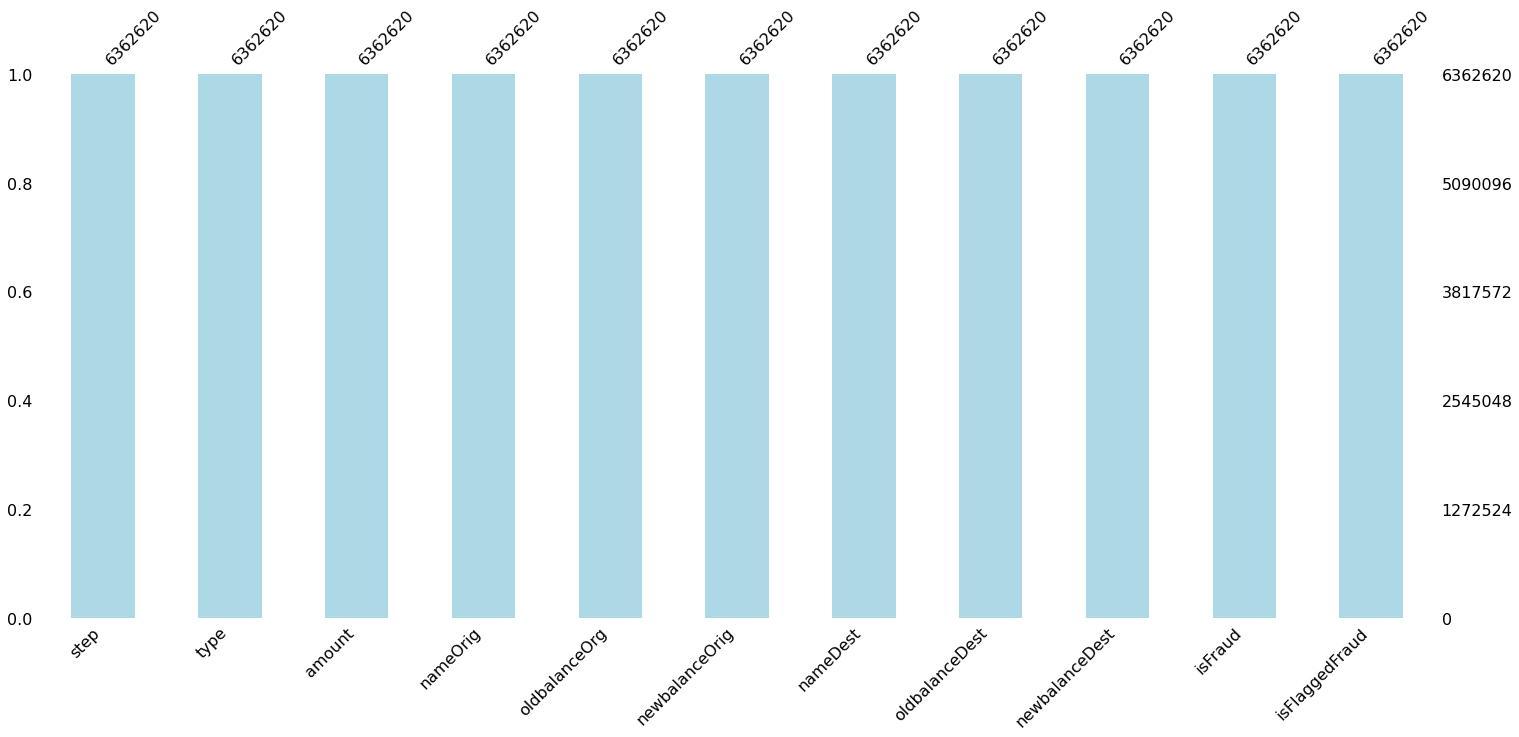

In [10]:
mns.bar(df,color='lightblue')
plt.show()

**Let us go analysing each column in the data**

In [11]:
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

**At Step 19 more number of transctions were done**

   **At Step 662 less number of transctions were done**

In [12]:
#column - type
#gives out the unique values present in the column 'type'
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
#let us check what is type for which more transctions were done
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

**CASH_OUT** were the highest 

In [14]:
#column - amount
#let us see some statistical measures of this column
df[['amount']].describe()

,amount
count,6.362620e+06
mean,1.798619e+05
std,6.038582e+05
min,0.000000e+00
25%,1.338957e+04
50%,7.487194e+04
75%,2.087215e+05
max,9.244552e+07


# Making different dataset for fraud and flaggedfraud

In [15]:
dfFundtransfer = df.loc[(df.isFraud==1)]

In [16]:
#constructing a dataframe for the data
df1 = pd.DataFrame(dfFundtransfer)

In [17]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [18]:
dfFraudTransfer2 = df.loc[(df.isFlaggedFraud == 1)]

In [19]:
#constructing a dataframe for the data
df2 = pd.DataFrame(dfFraudTransfer2)
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


**The above two dataset show that the number of fraud cases were 8213 and the number of flagged fraud cases were 16**

# Exploratory Data Analysis
Understanding the data Visually

In [20]:
#number of fraud cases
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

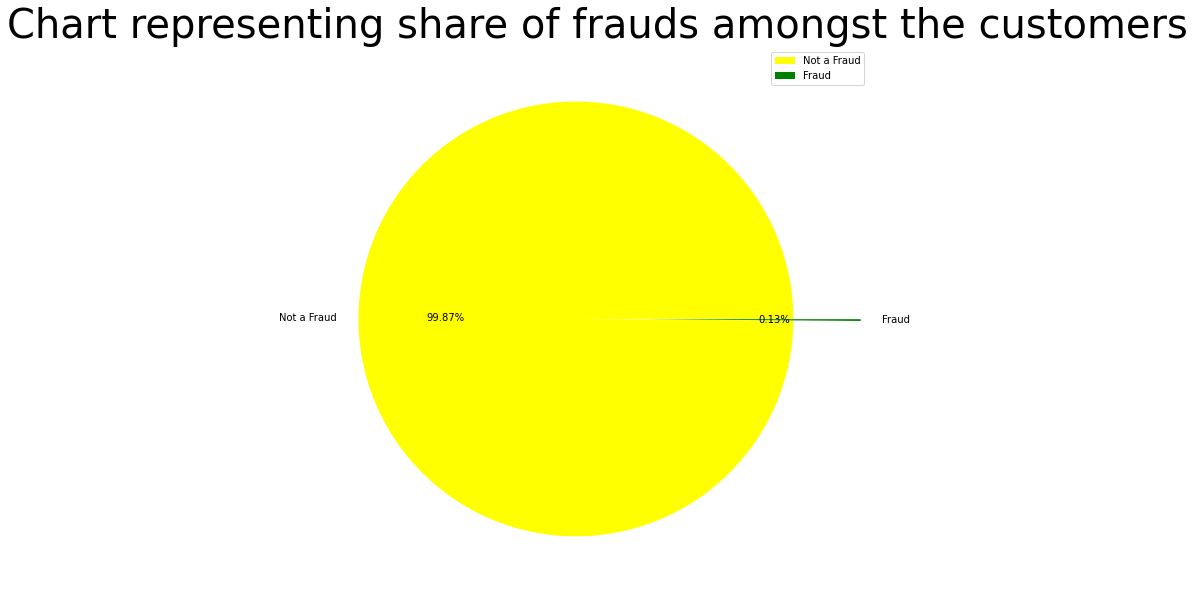

In [21]:
labels = ['Not a Fraud', 'Fraud']
colors = ['yellow', 'green']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%1.2f%%')
plt.axis('off')
plt.title('Chart representing share of frauds amongst the customers',fontsize = 40)
plt.legend()
plt.show()

**Among all the trasctions only 0.13% of transctions have a chance of fraud**

In [22]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

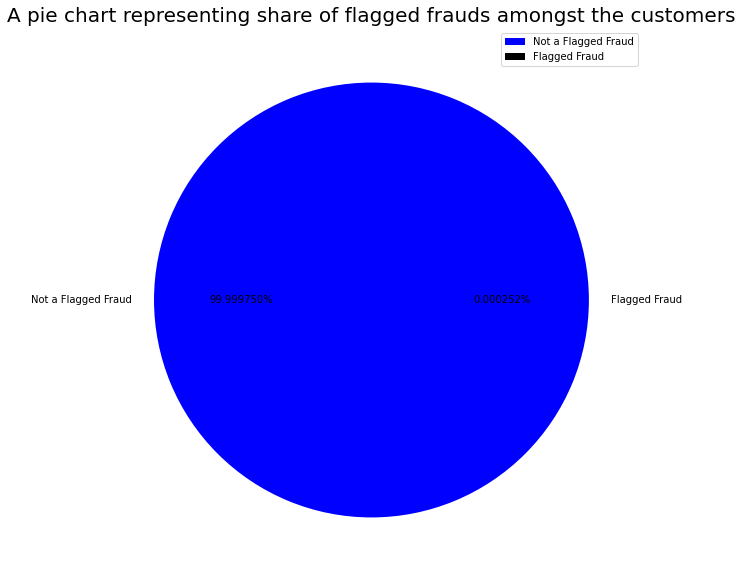

In [23]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['blue', 'black']
size = [6354407, 16]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10,10)
plt.pie(size, labels = labels, colors = colors, explode = (0,0), autopct='%1.6f%%')
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

**Amongst all the transactions only 0.000252% of transactions have a chance of fragged fraud which is very less.**

In [24]:
#visualization on the column 'step'
df['step'].value_counts().count()

743

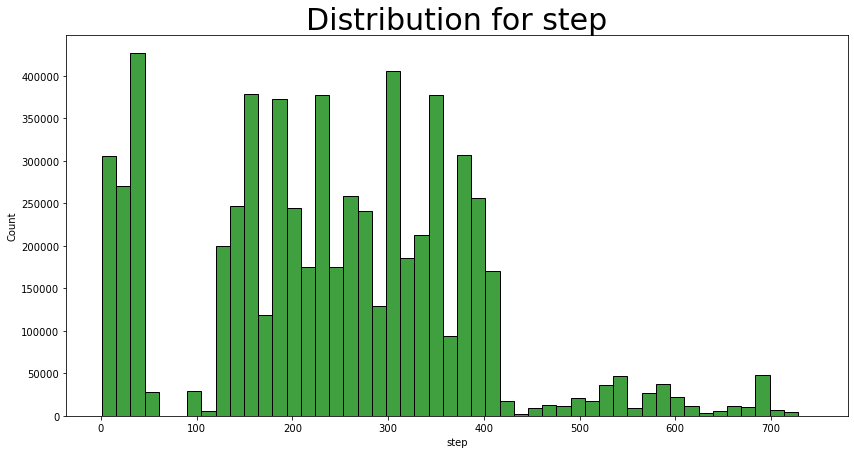

In [25]:
plt.figure(figsize=(14,7))
sns.histplot(df.step, bins=50, color='green')
plt.title('Distribution for step', fontsize = 30)
plt.show()

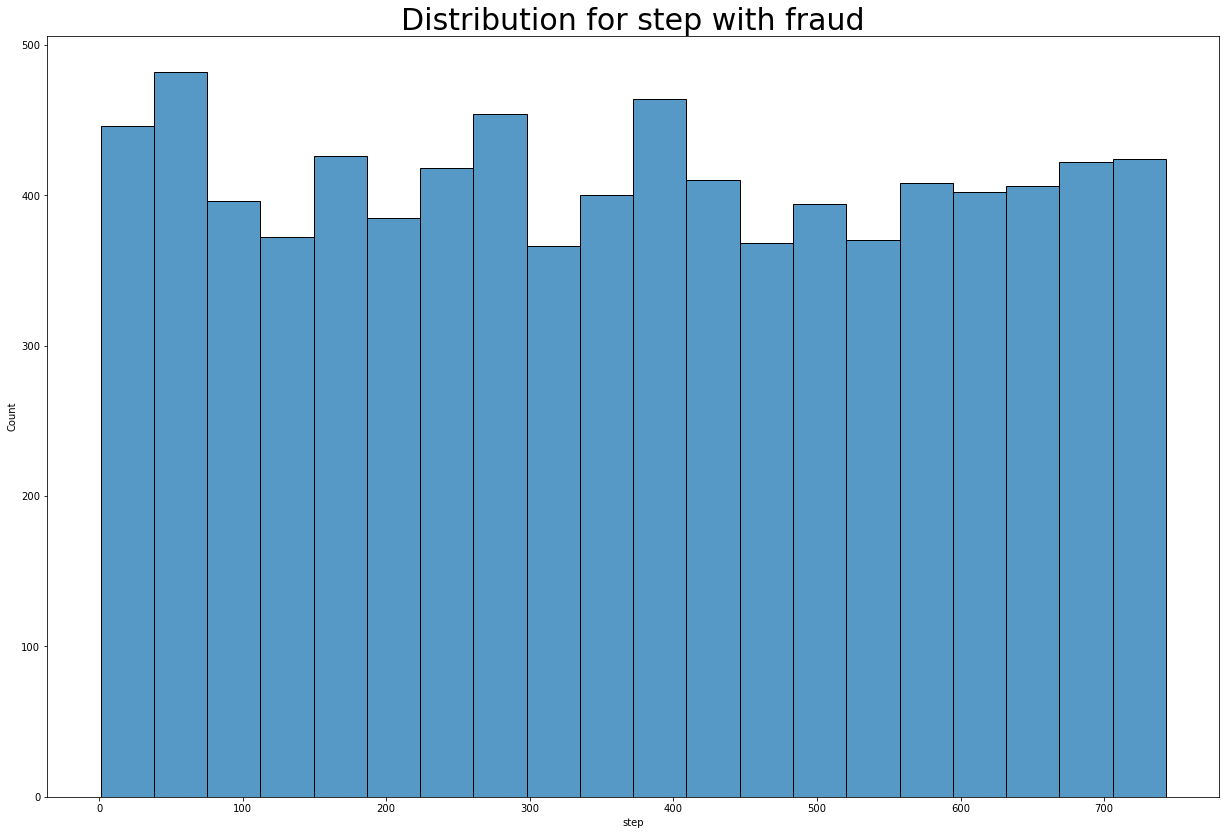

In [26]:
#histplot for fraud data
plt.figure(figsize = (21, 14))
sns.histplot(data=df1.step)
plt.title('Distribution for step with fraud', fontsize = 30)
plt.show()

**From the above dataset we can say that there have been cases of fraud transactions every hour equally.**

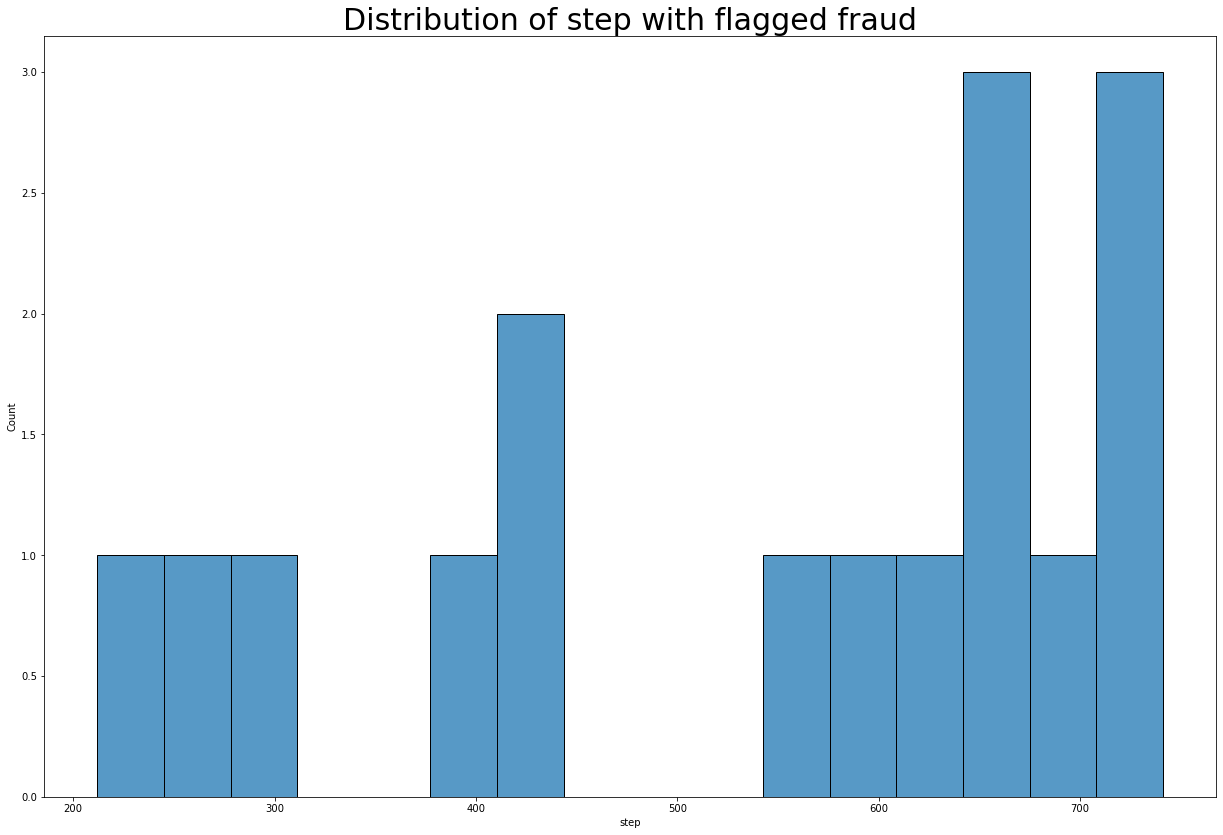

In [27]:
plt.figure(figsize = (21, 14))
sns.histplot(data = df2.step, bins=16)
plt.title('Distribution of step with flagged fraud', fontsize = 30)
plt.show()

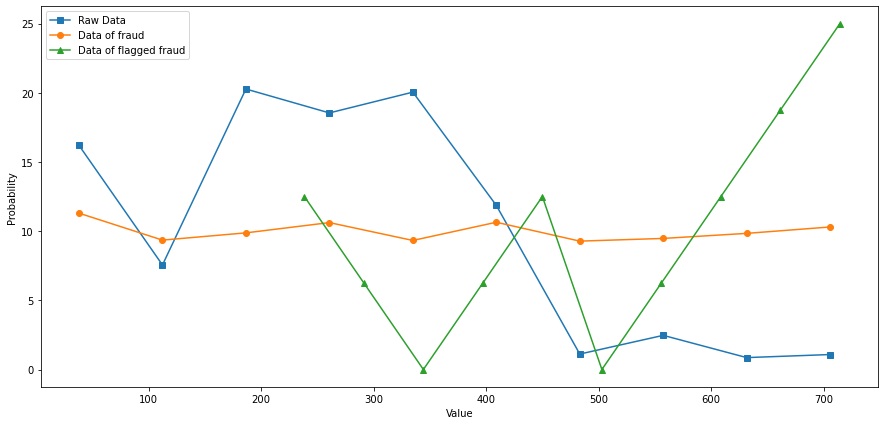

In [28]:
k = 10

y1, x1 = np.histogram(df.step, bins=k)
xx1 = (x1[0:-1] + x1[1:])/2
y1 = 100*y1/sum(y1)  #converted to probablity
 
y2, x2 = np.histogram(df1.step, bins=k)
xx2 = (x2[0:-1] + x2[1:])/2
y2 = 100*y2/sum(y2)

y3, x3 = np.histogram(df2.step , bins=k)
xx3 = (x3[0:-1] + x3[1:])/2
y3 = 100*y3/sum(y3)

plt.figure(figsize=(15,7))
#show the plots
plt.plot(xx1, y1, 's-', label = 'Raw Data')
plt.plot(xx2, y2, 'o-', label = 'Data of fraud')
plt.plot(xx3, y3, '^-', label = 'Data of flagged fraud')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()

**From the above visualization we can say that the occurance of flagged fraud increases near the end of the month.**

In [29]:
#in a month how many times each type transction was done
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

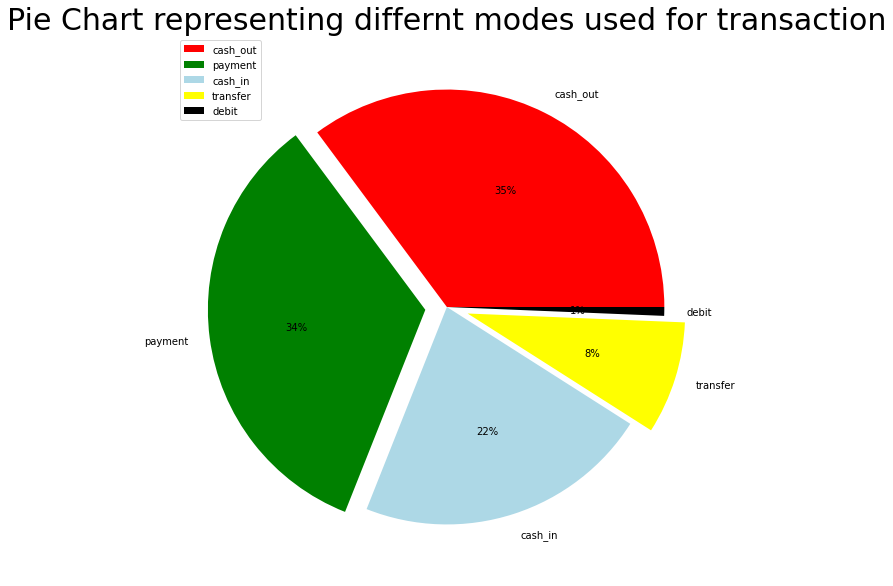

In [30]:
labels = ['cash_out', 'payment', 'cash_in', 'transfer', 'debit']
colors = ['red', 'green', 'lightblue', 'yellow', 'black']
size = [2237500, 2151495, 1399284, 532909, 41432]
explode = [0, 0.1, 0, 0.1 , 0]

plt.figure(figsize = (10, 10))
plt.pie(size,data= df.type, labels=labels, colors=colors, explode=explode, autopct='%1.0f%%')
plt.title('Pie Chart representing differnt modes used for transaction', fontsize=30)
plt.legend()
plt.show()

In [31]:
df1['type'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [32]:
print("Transfer Transaction")
print("Minimum Transaction :",df1.loc[(df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :",df1.loc[(df.type == 'TRANSFER')].amount.max())
print("\n")
print("Cash-out Transaction")
print("Minimum Transaction :",df1.loc[(df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :",df1.loc[(df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0


Cash-out Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


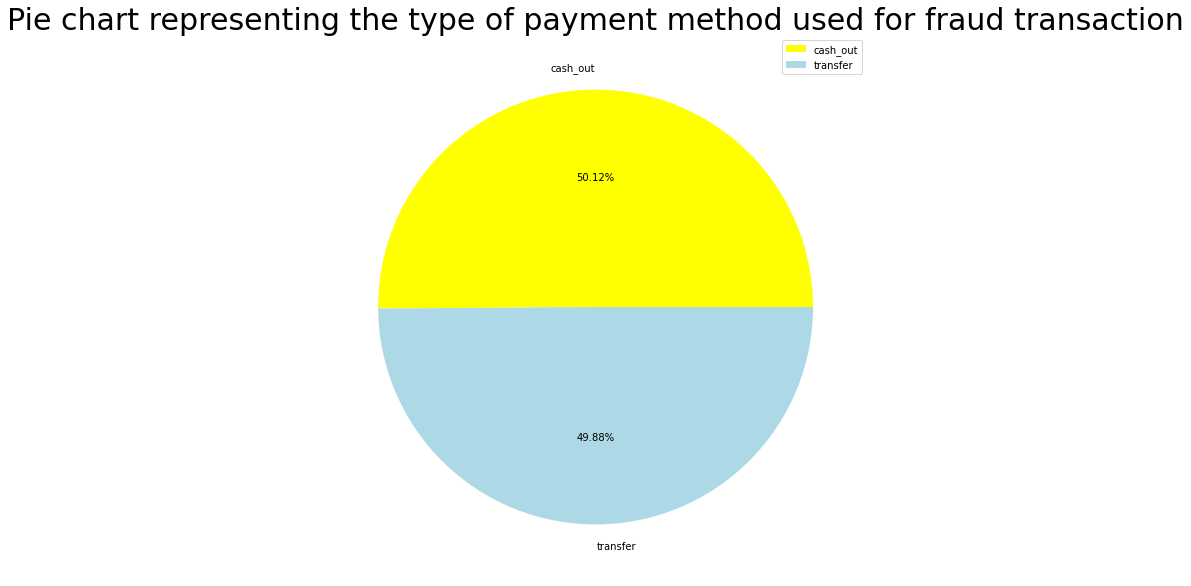

In [33]:
label = ['cash_out', 'transfer']
size = [4116, 4097]
colors = ['yellow', 'lightblue']

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, data=df1.type, labels=label, colors=colors, autopct='%1.2f%%')
plt.title('Pie chart representing the type of payment method used for fraud transaction', fontsize=30)
plt.legend()
plt.show()

**From the representation we can say that almost all the faulty transaction occurred using either cash out or transfer. Also the percentage for both is nearly equal.**

In [34]:
df2['type'].value_counts()

TRANSFER    16
Name: type, dtype: int64

In [35]:
print("Transfer Transaction")
print("Minimum Transaction :", df2.loc[(df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", df2.loc[(df.type == 'TRANSFER')].amount.max())

Transfer Transaction
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


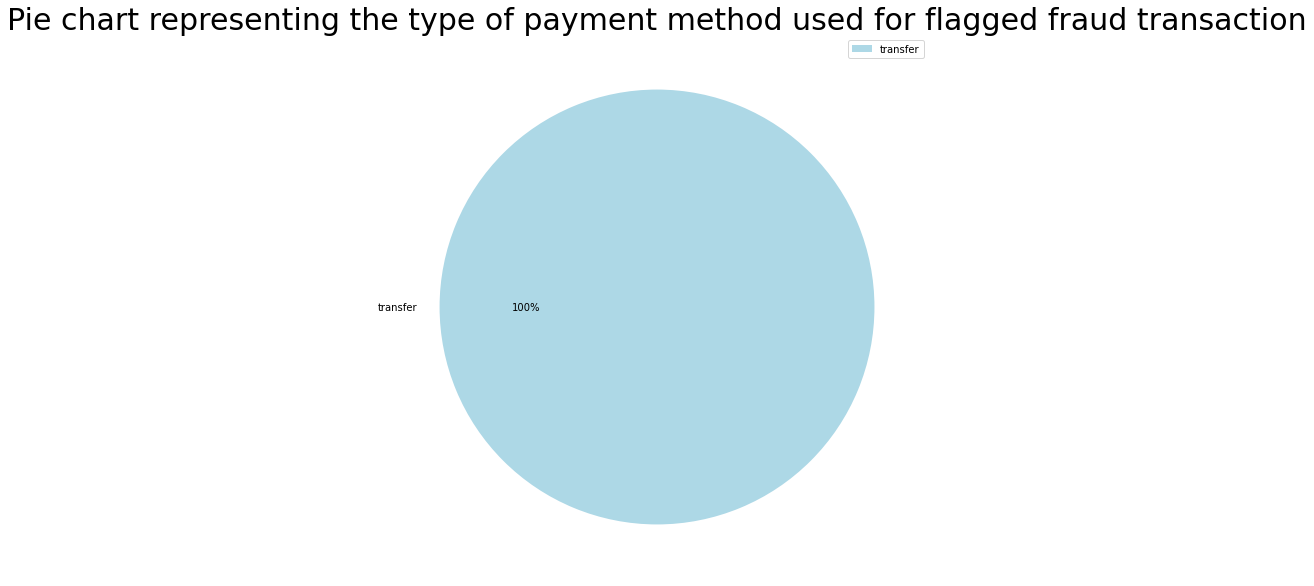

In [36]:
label = ['transfer']
size = [16]
colors = ['lightblue']

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, data=df.type, labels=label, colors=colors, autopct='%1.0f%%')
plt.title('Pie chart representing the type of payment method used for flagged fraud transaction', fontsize=30)
plt.legend()
plt.show()

**Above chart represents that all the flagged fraud transaction took place using the transfer payment method**

In [37]:
#maximum transctions happened for an amount
x = df['amount'].value_counts()
#to see first 10 records or rows
x.head(10)

10000000.0    3207
10000.0         88
5000.0          79
15000.0         68
500.0           65
100000.0        42
21500.0         37
120000.0        29
135000.0        20
0.0             16
Name: amount, dtype: int64

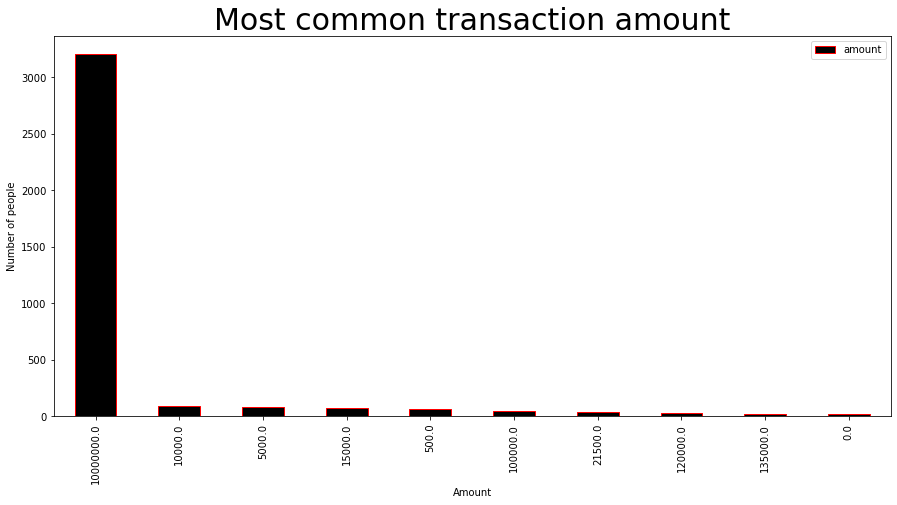

In [38]:
plt.figure(figsize=(15,7))
x.head(10).plot.bar(color = 'black', edgecolor = 'red')
plt.title('Most common transaction amount', fontsize=30)
plt.xlabel('Amount')
plt.ylabel('Number of people')
plt.legend()
plt.show()

In [39]:
#minimum amount in transctions
#to see first 10 records or rows
x.tail(10)

15198.29     1
185006.84    1
407493.68    1
41337.88     1
38494.39     1
91066.95     1
808.61       1
483714.88    1
775343.17    1
223098.05    1
Name: amount, dtype: int64

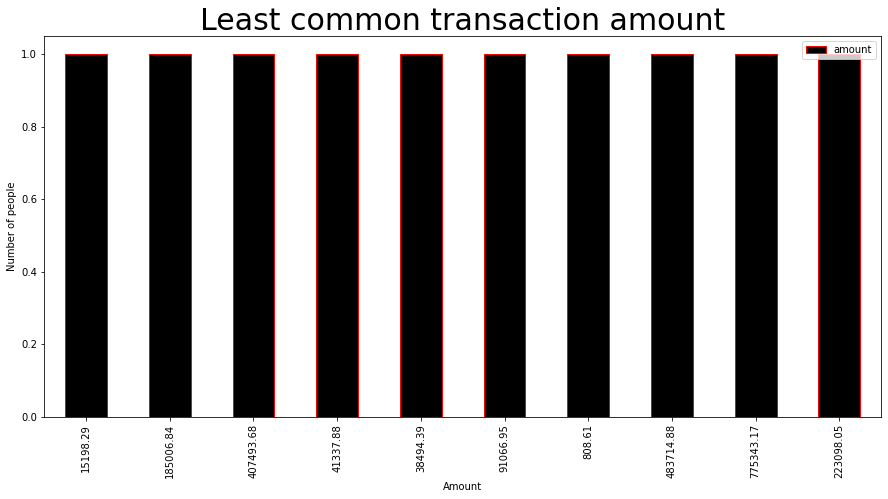

In [40]:
plt.figure(figsize=(15,7))
x.tail(10).plot.bar(color='black', edgecolor='red')
plt.title('Least common transaction amount', fontsize=30)
plt.xlabel('Amount')
plt.ylabel('Number of people')
plt.legend()
plt.show()

In [41]:
#amount of trasctions were done in case of fraud
x1 = df1['amount'].value_counts()
#to see first 10 records or rows
x1.head(10)

10000000.00    287
0.00            16
1165187.89       4
429257.45        4
3242183.64       2
474467.20        2
929106.32        2
18887.22         2
619824.64        2
398724.60        2
Name: amount, dtype: int64

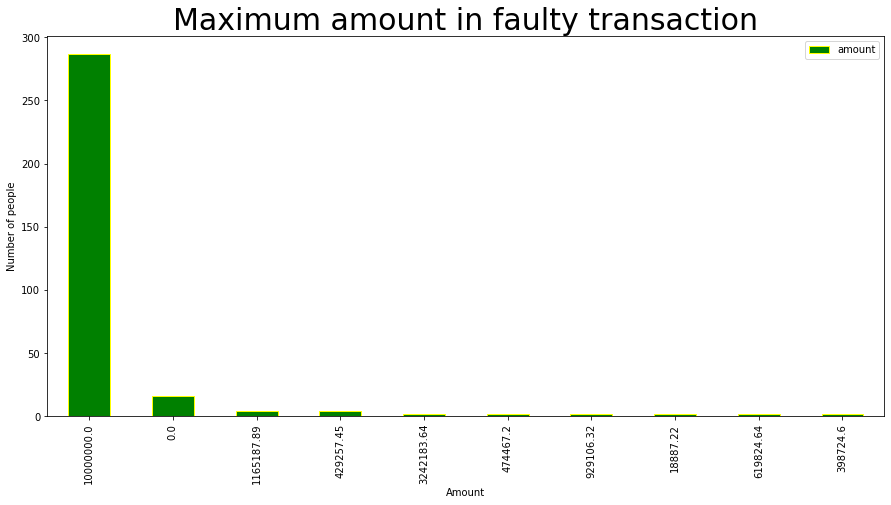

In [42]:
plt.figure(figsize=(15,7))
x1.head(10).plot.bar(color='green', edgecolor='yellow')
plt.title('Maximum amount in faulty transaction', fontsize=30)
plt.xlabel('Amount')
plt.ylabel('Number of people')
plt.legend()
plt.show()

**From the above graph we can predict that most of the faulty transactions are of very high amount**

In [43]:
#to see first 10 records or rows
x1.tail(10)

89571.46      1
577418.98     1
39713.28      1
5674547.89    1
40611.22      1
7316255.05    1
234377.29     1
42062.82      1
3441041.46    1
4892193.09    1
Name: amount, dtype: int64

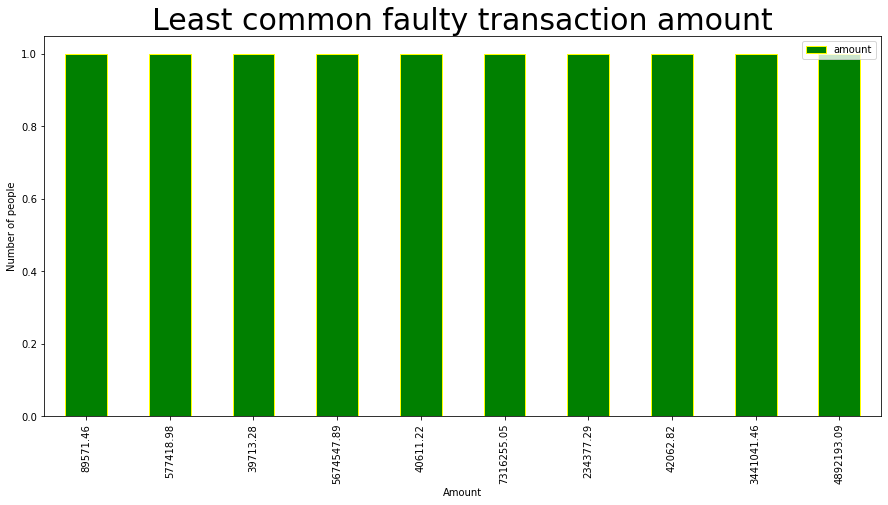

In [44]:
plt.figure(figsize=(15,7))
x1.tail(10).plot.bar(color='green', edgecolor='yellow')
plt.title('Least common faulty transaction amount', fontsize=30)
plt.xlabel('Amount')
plt.ylabel('Number of people')
plt.legend()
plt.show()

In [45]:
#amount in case of flagged fraud
x3 = df2['amount'].value_counts()

In [46]:
#to see first 10 records or rows
x3.head(10)

10000000.00    3
3576297.10     1
4953893.08     1
5674547.89     1
9585040.37     1
1343002.08     1
536624.41      1
399045.08      1
3441041.46     1
353874.22      1
Name: amount, dtype: int64

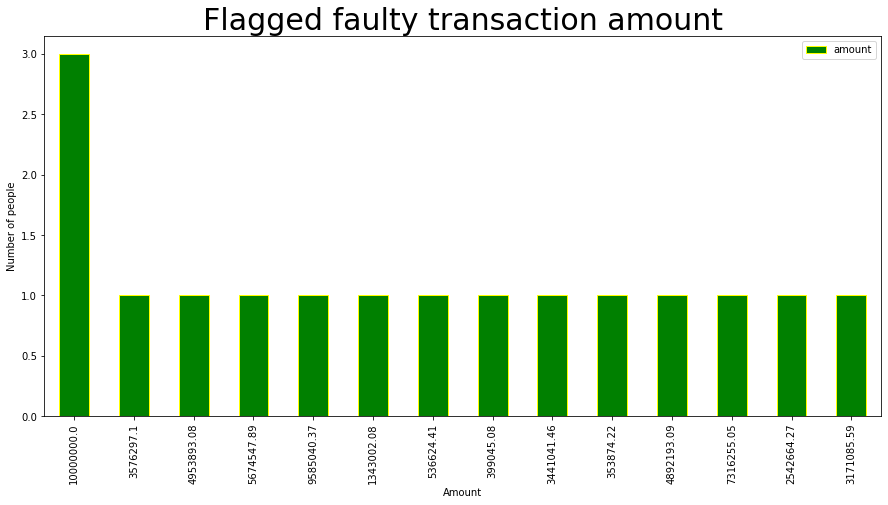

In [47]:
plt.figure(figsize=(15,7))
x3.plot.bar(color='green', edgecolor='yellow')
plt.title('Flagged faulty transaction amount', fontsize=30)
plt.xlabel('Amount')
plt.ylabel('Number of people')
plt.legend()
plt.show()

**Visualizing Old and New names**

In [48]:
#let us see first character in the string 
df['nameOrig'].str[:1].value_counts()

C    6362620
Name: nameOrig, dtype: int64

In [49]:
df['nameDest'].str[:1].value_counts()

C    4211125
M    2151495
Name: nameDest, dtype: int64

In [50]:
df1['nameOrig'].str[:1].value_counts()

C    8213
Name: nameOrig, dtype: int64

In [51]:
df1['nameDest'].str[:1].value_counts()

C    8213
Name: nameDest, dtype: int64

In [52]:
df1['nameOrig'].nunique()

8213

In [53]:
df1['nameOrig'].value_counts()

C394488466     1
C467140343     1
C1366832046    1
C517450408     1
C1790385148    1
              ..
C703367289     1
C1390208933    1
C158801009     1
C2128296951    1
C1216438383    1
Name: nameOrig, Length: 8213, dtype: int64

In [54]:
df1['nameDest'].nunique()

8169

In [55]:
df1['nameDest'].value_counts()

C1366192319    2
C1981613973    2
C686334805     2
C104038589     2
C14138104      2
              ..
C1601626536    1
C1388180627    1
C898783752     1
C1447531864    1
C265543802     1
Name: nameDest, Length: 8169, dtype: int64

**Here we can say that there are 22 times when the fraud is done by the same destination but no account has been frauded twice**

In [56]:
df2['nameOrig'].str[:1].value_counts()

C    16
Name: nameOrig, dtype: int64

In [57]:
df2['nameDest'].str[:1].value_counts()

C    16
Name: nameDest, dtype: int64

In [58]:
df2['nameOrig'].nunique()

16

In [59]:
df2['nameDest'].nunique()

16

**From the above section we are clear that all the fraud and fragged fraud transactions are done by the id starting with C and not M.**

**Correlation of the Columns**

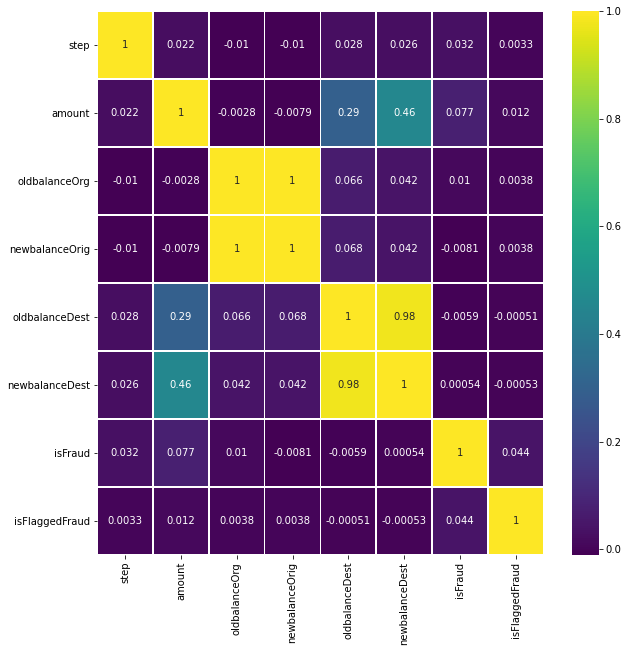

In [60]:
data = df.corr()
sns.heatmap(data,annot=True,cmap='viridis',linewidths=0.5)
plt.show()

# Feature Engineering

In [61]:
df3 = df.copy()

In [62]:
#displays the first 5 rows or records
df3.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [63]:
#dropping the 'nameOrig' and 'nameDest' columns
df3.drop(columns=['nameOrig','nameDest','isFlaggedFraud'],inplace=True)

In [64]:
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [65]:
df3['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

**Applying encoding into Categorical Columns inorder to convert it to Numerical values(used OneHotEncoding)**

In [69]:
df3 = pd.get_dummies(df3,columns=['type'])

In [72]:
df3.drop(columns=['type_TRANSFER'],inplace=True)

In [73]:
df3.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1


**Adding a new feature in it**

In [75]:
df3['errorOrg'] = df['newbalanceOrig']-df['oldbalanceOrg']
df3['errorDest'] = df['oldbalanceDest']-df['newbalanceDest']

In [76]:
df3.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,errorOrg,errorDest
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,-9839.64,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,-1864.28,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,-181.00,0.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,-181.00,21182.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,-11668.14,0.0


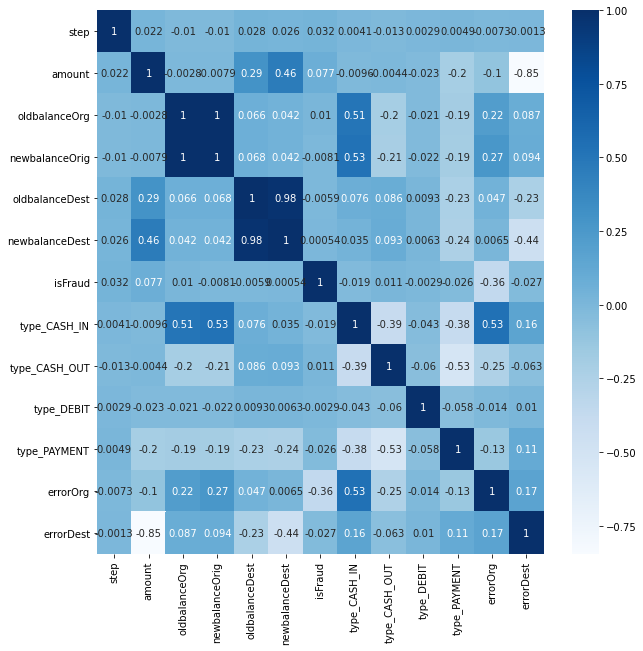

In [77]:
sns.heatmap(df3.corr(),annot=True,cmap='Blues')
plt.show()

**Here we can conclude that, oldbalanceOrg and newbalanceorig are highly correlated and also oldbalanceDet and newbalanceDest. So we can removes a column**

In [78]:
df3.drop(columns=['oldbalanceOrg','oldbalanceDest'],inplace=True)

In [79]:
df3.head()

,step,amount,newbalanceOrig,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,errorOrg,errorDest
0,1,9839.64,160296.36,0.0,0,0,0,0,1,-9839.64,0.0
1,1,1864.28,19384.72,0.0,0,0,0,0,1,-1864.28,0.0
2,1,181.00,0.00,0.0,1,0,0,0,0,-181.00,0.0
3,1,181.00,0.00,0.0,1,0,1,0,0,-181.00,21182.0
4,1,11668.14,29885.86,0.0,0,0,0,0,1,-11668.14,0.0


In [80]:
df.shape

(6362620, 11)

In [ ]:
x = df3.drop(columns=['isFraud']) #columns 
y = df3['isFraud']#target variable

**Balancing the Dataset**

**It can be clearly seen that the rows or records in the dataframe are almost Unfraud and very few were said to be fraud.**
**So data set is getting imbalanced, so we have to balance it using imblearn library**

In [87]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=20,sampling_strategy=0.5)
x_osam,y_osam = sm.fit_resample(x,y)
y_osam.value_counts()

0    6354407
1    3177203
Name: isFraud, dtype: int64

**Normalization**

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)